**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:13<00:00, 238MB/s]
100% 2.04G/2.04G [00:13<00:00, 158MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Raspberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Cedar_apple_rust', 'Squash___Powdery_mildew']
38
['Raspberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Cedar_apple_rust', 'Squash___Powdery_mildew']
38
['Raspberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Cedar_apple_rust', 'Squash___Powdery_mildew']


**Number of Classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['6f771370-1fb8-440e-a23f-4e0f29dbd65b___Mt.N.V_HL 6150.JPG', '8af21b75-7158-4286-acdf-ef35cf54fe26___Mt.N.V_HL 6116.JPG', '9268b279-6e48-45ec-98b9-58475d9466e8___Mt.N.V_HL 9132.JPG', '944da534-67c1-4f04-8fa7-1e11492736ed___Mt.N.V_HL 6186.JPG', '9d78272e-303b-4fcc-af33-ff47d89a312d___Mt.N.V_HL 8959.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


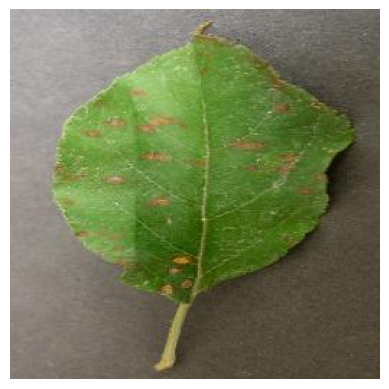

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [25]:
!pip install split-folders
import splitfolders
import os

In [59]:
base_dir = 'plantvillage dataset/color'
splitfolders.ratio(base_dir, output="dataset_split", seed=40, ratio=(.8, .1, .1))

Copying files: 54305 files [00:11, 4787.98 files/s]


Data Augementation

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [62]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 43429 images belonging to 38 classes.


In [63]:
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 5417 images belonging to 38 classes.


In [64]:
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 5459 images belonging to 38 classes.


importing pretrained model


In [65]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, metrics

# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [66]:
# Fine-tuning: Freeze early layers, unfreeze the rest for higher accuracy
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [67]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(38, activation='softmax')
])


In [68]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')]
)

In [69]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        48,678 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,306,662 (8.80 MB)

 Trainable params: 1,910,118 (7.29 MB)

 Non-trainable params: 396,544 (1.51 MB)

Model Training

In [70]:

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 546s 387ms/step - accuracy: 0.7590 - loss: 0.9376 - precision: 0.9245 - recall: 0.6601 - val_accuracy: 0.9049 - val_loss: 0.2921 - val_precision: 0.9217 - val_recall: 0.8931
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 504s 371ms/step - accuracy: 0.9624 - loss: 0.1165 - precision: 0.9702 - recall: 0.9562 - val_accuracy: 0.9705 - val_loss: 0.0893 - val_precision: 0.9747 - val_recall: 0.9679
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 513s 378ms/step - accuracy: 0.9767 - loss: 0.0712 - precision: 0.9805 - recall: 0.9729 - val_accuracy: 0.9614 - val_loss: 0.1141 - val_precision: 0.9675 - val_recall: 0.9566
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 508s 374ms/step - accuracy: 0.9814 - loss: 0.0557 - precision: 0.9843 - recall: 0.9790 - val_accuracy: 0.9790 - val_loss: 0.0685 - val_precision: 0.9809 - val_recall: 0.9769
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 511s 377ms/step - accuracy: 0.9848 - loss: 0.0462 - precision: 0.9865 - recall: 0.9834 - val_accura

In [71]:
model.save('plant_disease_best_model.h5')

Evaluation Metric

In [72]:
import numpy as np

def evaluate_best_model(generator, name):
    print(f"--- {name} SET METRICS ---")
    results = model.evaluate(generator, verbose=0)
    loss, acc, prec, rec = results[0], results[1], results[2], results[3]

    # Calculate F1-Score
    f1 = 2 * (prec * rec) / (prec + rec + 1e-7)

    print(f"Accuracy:  {acc*100:.2f}%")
    print(f"Loss:      {loss:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}\n")



In [73]:
evaluate_best_model(train_generator, "TRAINING")
evaluate_best_model(val_generator, "VALIDATION")
evaluate_best_model(test_generator, "TESTING")

--- TRAINING SET METRICS ---
Accuracy:  99.21%
Loss:      0.0232
Precision: 0.9926
Recall:    0.9915
F1-Score:  0.9921

--- VALIDATION SET METRICS ---
Accuracy:  98.49%
Loss:      0.0465
Precision: 0.9867
Recall:    0.9839
F1-Score:  0.9853

--- TESTING SET METRICS ---
Accuracy:  98.50%
Loss:      0.0451
Precision: 0.9857
Recall:    0.9844
F1-Score:  0.9851



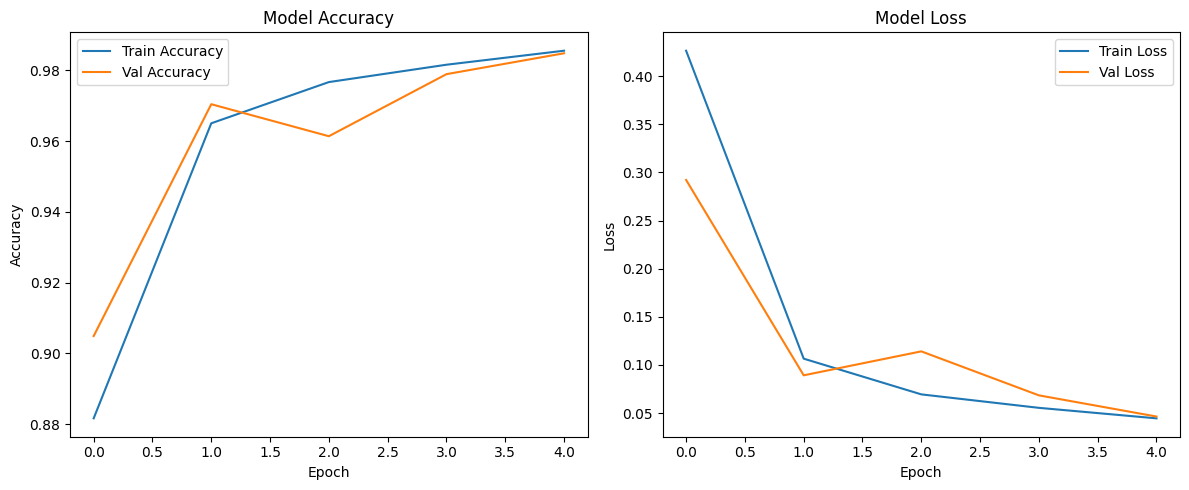

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='#ff7f0e')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#1f77b4')
plt.plot(history.history['val_loss'], label='Val Loss', color='#ff7f0e')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Building a Predictive System**

In [75]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [76]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [77]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [78]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [81]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image_class(model, image_path, class_indices):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0,1]

    # Get predictions
    predictions = model.predict(img_array)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(predictions[0])

    # Get the confidence score (the actual probability value)
    confidence_score = np.max(predictions[0])

    # Map index to class name
    inv_class_indices = {v: k for k, v in class_indices.items()}
    predicted_class_name = inv_class_indices[predicted_class_index]

    return predicted_class_name, confidence_score

In [84]:
# Example Usage
image_path = '/content/dataset_split/test/Grape___healthy/0f7500d4-cf47-4f9f-a505-455a4f7ca2e6___Mt.N.V_HL 9043.JPG'

# Call the updated function
predicted_class_name, confidence = predict_image_class(model, image_path, train_generator.class_indices)

# Output the result with metrics
print(f"Predicted Class: {predicted_class_name}")

# Simple logic to check reliability
if confidence < 0.60:
    print("Warning: Low confidence prediction. Results may be unreliable.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: Grape___healthy
